In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
netflix_dataset = pd.read_csv('/content/drive/MyDrive/combined_data_1.txt', header = None, names =['Cust_Id', 'Rating'], usecols =[0,1])
netflix_dataset.head()

,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0


In [ ]:
netflix_dataset

,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0
...,...,...
24058258,2591364,2.0
24058259,1791000,2.0
24058260,512536,5.0
24058261,988963,3.0


In [ ]:
netflix_dataset.dtypes

Cust_Id     object
Rating     float64
dtype: object

In [ ]:
netflix_dataset.shape

(24058263, 2)

In [ ]:
movie_count = netflix_dataset.isnull().sum()
movie_count

Cust_Id       0
Rating     4499
dtype: int64

In [ ]:
# To calculate how many customers we are having in dataset
customer_count = netflix_dataset['Cust_Id'].nunique()

In [ ]:
customer_count

475257

In [ ]:
customer_count = netflix_dataset['Cust_Id'].nunique() - movie_count
customer_count

Cust_Id    475257
Rating     470758
dtype: int64

In [ ]:
# get the total number of ratings
rating_count = netflix_dataset['Cust_Id'].count() - movie_count
rating_count

Cust_Id    24058263
Rating     24053764
dtype: int64

In [ ]:
# to find out how many peoples have given 1,2,3,4,5 ratings to the movies
stars = netflix_dataset.groupby('Rating')['Rating'].agg(['count'])

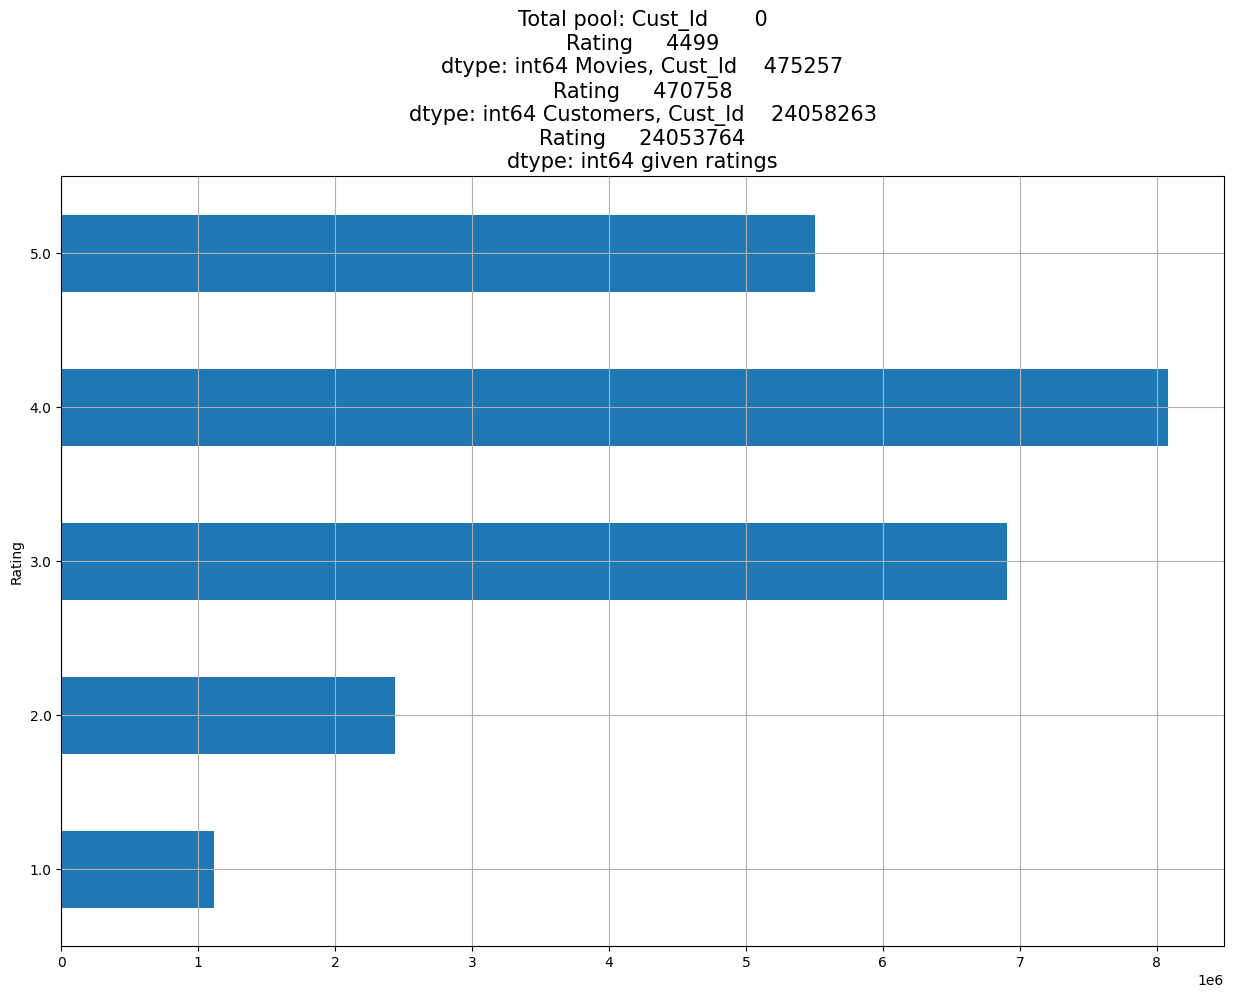

In [ ]:
ax = stars.plot(kind = 'barh', legend=False, figsize=(15,10))
plt.title(f'Total pool: {movie_count} Movies, {customer_count} Customers, {rating_count} given ratings', fontsize=15)
plt.grid(True)

In [ ]:
# add another column that will have movie_id
# first of all we will be calculating how many null values we are having in rating columns
df_nan = pd.DataFrame(pd.isnull(netflix_dataset.Rating))

In [ ]:
df_nan

,Rating
0,True
1,False
2,False
3,False
4,False
...,...
24058258,False
24058259,False
24058260,False
24058261,False


In [ ]:
df_nan = df_nan[df_nan['Rating'] == True]

In [ ]:
df_nan

,Rating
0,True
548,True
694,True
2707,True
2850,True
...,...
24046714,True
24047329,True
24056849,True
24057564,True


In [ ]:
df_nan.shape

(4499, 1)

In [ ]:
df_nan.head()

,Rating
0,True
548,True
694,True
2707,True
2850,True


In [ ]:
df_nan.tail()

,Rating
24046714,True
24047329,True
24056849,True
24057564,True
24057834,True


In [ ]:
df_nan = df_nan.reset_index()

In [ ]:
df_nan

,index,Rating
0,0,True
1,548,True
2,694,True
3,2707,True
4,2850,True
...,...,...
4494,24046714,True
4495,24047329,True
4496,24056849,True
4497,24057564,True


In [ ]:
df_nan.iloc[-1,0]

24057834

In [ ]:
24057834-24053764-1

4069

In [ ]:
#now we will create a numpy array that will contain 1 from values 0 to 547, 2 from 549 to 693 and so on
movie_np = []
movie_id = 1

for i, j in zip(df_nan['index'][1:], df_nan['index'][:-1]):
  temp = np.full((1, i-j-1), movie_id)
  movie_np = np.append(movie_np, temp)
  movie_id += 1

#account for last record and corresponding length
#numpy approach
last_record = np.full((1, len(netflix_dataset)- df_nan.iloc[-1, 0-1]), movie_id)
movie_np=np.append(movie_np, last_record)

In [ ]:
len(netflix_dataset)

24058263

In [ ]:
netflix_dataset

,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0
...,...,...
24058258,2591364,2.0
24058259,1791000,2.0
24058260,512536,5.0
24058261,988963,3.0


In [ ]:
df_nan['index'][1:]

1            548
2            694
3           2707
4           2850
5           3991
          ...   
4494    24046714
4495    24047329
4496    24056849
4497    24057564
4498    24057834
Name: index, Length: 4498, dtype: int64

In [ ]:
df_nan['index'][:-1]

0              0
1            548
2            694
3           2707
4           2850
          ...   
4493    24046583
4494    24046714
4495    24047329
4496    24056849
4497    24057564
Name: index, Length: 4498, dtype: int64

In [ ]:
x = zip(df_nan['index'][1:], df_nan['index'][:-1])

In [ ]:
tuple(x)

((548, 0),
 (694, 548),
 (2707, 694),
 (2850, 2707),
 (3991, 2850),
 (5011, 3991),
 (5105, 5011),
 (20016, 5105),
 (20112, 20016),
 (20362, 20112),
 (20561, 20362),
 (21108, 20561),
 (21234, 21108),
 (21353, 21234),
 (21644, 21353),
 (24344, 21644),
 (31453, 24344),
 (42176, 31453),
 (42716, 42176),
 (42833, 42716),
 (43052, 42833),
 (43256, 43052),
 (43872, 43256),
 (45206, 43872),
 (46414, 45206),
 (52276, 46414),
 (52550, 52276),
 (92303, 52550),
 (92827, 92303),
 (211241, 92827),
 (211463, 211241),
 (213318, 211463),
 (220209, 213318),
 (220318, 220209),
 (221158, 220318),
 (222098, 221158),
 (222380, 222098),
 (223183, 222380),
 (223936, 223183),
 (224428, 223936),
 (224522, 224428),
 (224651, 224522),
 (224757, 224651),
 (233259, 224757),
 (235879, 233259),
 (242438, 235879),
 (244789, 242438),
 (248381, 244789),
 (248613, 248381),
 (248942, 248613),
 (249033, 248942),
 (254181, 249033),
 (254296, 254181),
 (254456, 254296),
 (256863, 254456),
 (258697, 256863),
 (262260, 258697)

In [ ]:
temp = np.full((1, 547), 1)

In [ ]:
print(temp)

[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

In [ ]:
netflix_dataset = netflix_dataset[pd.notnull(netflix_dataset['Rating'])]
netflix_dataset['Movie_Id']= pd.Series(movie_np.astype(int))
netflix_dataset['Cust_Id']=netflix_dataset['Cust_Id'].astype(int)
print(netflix_dataset)

<ipython-input-34-ba68fd45a9b6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_dataset['Movie_Id']= pd.Series(movie_np.astype(int))


          Cust_Id  Rating  Movie_Id
1         1488844     3.0         1
2          822109     5.0         1
3          885013     4.0         1
4           30878     4.0         1
5          823519     3.0         1
...           ...     ...       ...
24058258  2591364     2.0      4499
24058259  1791000     2.0      4499
24058260   512536     5.0      4499
24058261   988963     3.0      4499
24058262  1704416     3.0      4499

[24053764 rows x 3 columns]


<ipython-input-34-ba68fd45a9b6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_dataset['Cust_Id']=netflix_dataset['Cust_Id'].astype(int)


In [ ]:
netflix_dataset.head()

,Cust_Id,Rating,Movie_Id
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
5,823519,3.0,1


In [ ]:
netflix_dataset.tail()

,Cust_Id,Rating,Movie_Id
24058258,2591364,2.0,4499
24058259,1791000,2.0,4499
24058260,512536,5.0,4499
24058261,988963,3.0,4499
24058262,1704416,3.0,4499


In [ ]:
#now we will remove all the users that have rated less movies and
#also all those movies that has been rated less in numbers
f = ['count', 'mean']

In [ ]:
dataset_movie_summary = netflix_dataset.groupby('Movie_Id').agg(f)

In [ ]:
dataset_movie_summary

Cust_Id               Rating          
           count          mean  count      mean
Movie_Id                                       
1            546  1.248839e+06    546  3.747253
2            144  1.346109e+06    144  3.562500
3           2011  1.324921e+06   2011  3.641969
4            141  1.373782e+06    141  2.737589
5           1139  1.302997e+06   1139  3.917471
...          ...           ...    ...       ...
4495         614  1.345615e+06    614  3.159609
4496        9516  1.333066e+06   9516  3.473939
4497         714  1.288597e+06    714  3.788515
4498         269  1.254103e+06    269  3.713755
4499        4924  1.317487e+06   4924  3.448416

[4499 rows x 4 columns]

In [ ]:
dataset_movie_summary = netflix_dataset.groupby('Movie_Id')['Rating'].agg(f)

In [ ]:
dataset_movie_summary

,count,mean
Movie_Id,,
1,546,3.747253
2,144,3.562500
3,2011,3.641969
4,141,2.737589
5,1139,3.917471
...,...,...
4495,614,3.159609
4496,9516,3.473939
4497,714,3.788515


In [ ]:
#now we will store all the movie_id indexes in a variable dataset_movie_summary.index and convert the datatype to int
# dataset_movie_summary.index=dataset_movie_summary.index.map(int)

In [ ]:
movie_benchmark = round(dataset_movie_summary['count'].quantile(0.7), 0)

In [ ]:
movie_benchmark

1798.0

In [ ]:
dataset_movie_summary['count']

Movie_Id
1        546
2        144
3       2011
4        141
5       1139
        ... 
4495     614
4496    9516
4497     714
4498     269
4499    4924
Name: count, Length: 4499, dtype: int64

In [ ]:
drop_movie_list = dataset_movie_summary[dataset_movie_summary['count']<movie_benchmark].index

In [ ]:
drop_movie_list

Int64Index([   1,    2,    4,    5,    6,    7,    9,   10,   11,   12,
            ...
            4483, 4484, 4486, 4487, 4489, 4491, 4494, 4495, 4497, 4498],
           dtype='int64', name='Movie_Id', length=3149)

In [ ]:
dataset_cust_summary = netflix_dataset.groupby('Cust_Id')['Rating'].agg(f)
dataset_cust_summary

,count,mean
Cust_Id,,
6,153,3.333333
7,195,4.066667
8,21,4.000000
10,49,3.346939
25,4,3.500000
...,...,...
2649404,12,4.083333
2649409,10,4.000000
2649421,3,5.000000


In [ ]:
cust_benchmark = round(dataset_cust_summary['count'].quantile(0.7), 0)

In [ ]:
cust_benchmark

52.0

In [ ]:
drop_cust_list = dataset_cust_summary[dataset_cust_summary['count']<cust_benchmark].index

In [ ]:
drop_cust_list

Int64Index([      8,      10,      25,      33,      42,      59,      83,
                 87,      94,     116,
            ...
            2649343, 2649351, 2649375, 2649376, 2649379, 2649384, 2649401,
            2649404, 2649409, 2649421],
           dtype='int64', name='Cust_Id', length=327300)

In [ ]:
print("The original dataset has:", netflix_dataset.shape)

The original dataset has: (24053764, 3)


In [ ]:
netflix_dataset = netflix_dataset[~netflix_dataset['Movie_Id'].isin(drop_movie_list)]
netflix_dataset = netflix_dataset[~netflix_dataset['Cust_Id'].isin(drop_cust_list)]
print('After the triming, the shape is: {}'.format(netflix_dataset.shape))

After the triming, the shape is: (17297193, 3)


In [ ]:
#now we will prepare the dataset for SVD and it takes the matrix as the input
# so for input, we will convert the dataset into sparse matrix
#4499 movies
df_p = pd.pivot_table(netflix_dataset, values='Rating', index = 'Cust_Id', columns = 'Movie_Id')
print(df_p.shape)

(143458, 1350)


In [ ]:
df_p

Movie_Id,3,8,16,17,18,26,28,30,32,33,...,4474,4478,4479,4485,4488,4490,4492,4493,4496,4499
Cust_Id,,,,,,,,,,,,,,,,,,,,,
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,5.0,NaN,NaN,NaN,NaN,4.0,5.0,NaN,NaN,...,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN
97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
134,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2649370,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2649378,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2649388,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,...,NaN,NaN,3.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
import pandas as pd

In [ ]:
df_title = pd.read_csv("/content/drive/MyDrive/movie_titles.csv", encoding='ISO-8859-1', header=None, usecols=[0,1,2], names =['Movie_Id', 'Year', 'Name'])

df_title.set_index('Movie_Id', inplace=True)

In [ ]:
df_title.head()

,Year,Name
Movie_Id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW


In [ ]:
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 6.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=2811696 sha256=a96e3aac35ec2cb00fed23c75813b5cf451f75570a7b0180a08af010dce89646
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [ ]:
# model building
import math
import seaborn as sns
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

In [ ]:
reader = Reader()

In [ ]:
data = Dataset.load_from_df(netflix_dataset[['Cust_Id', 'Movie_Id', 'Rating']][:100000], reader)

In [ ]:
svd = SVD()
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=3)

{'test_rmse': array([1.00043962, 1.0001026 , 0.99337087]),
 'test_mae': array([0.7876448 , 0.79433262, 0.79398836]),
 'fit_time': (1.3253977298736572, 1.4060306549072266, 1.7283384799957275),
 'test_time': (0.2788856029510498, 0.3502538204193115, 0.5163650512695312)}

In [ ]:
netflix_dataset.head()

,Cust_Id,Rating,Movie_Id
692,1283204,3.0,3
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3


In [ ]:
#so first we take user 1283204 and we try to recommend some movies based on the past data
#He rated so many movies with 3 *
dataset_1283204 = netflix_dataset[(netflix_dataset['Cust_Id'] == 1283204) & (netflix_dataset['Rating'] == 3)]
dataset_1283204

,Cust_Id,Rating,Movie_Id
692,1283204,3.0,3
813008,1283204,3.0,191
991224,1283204,3.0,223
1660983,1283204,3.0,313
7205928,1283204,3.0,1428
7446879,1283204,3.0,1482
9877927,1283204,3.0,1905
11843905,1283204,3.0,2290
12617599,1283204,3.0,2418
13133342,1283204,3.0,2471


In [ ]:
dataset_712664=netflix_dataset[(netflix_dataset['Cust_Id'] ==712664)& (netflix_dataset['Rating']==5)]
dataset_712664

,Cust_Id,Rating,Movie_Id
696,712664,5.0,3
308787,712664,5.0,79
577555,712664,5.0,175
898451,712664,5.0,199
1019562,712664,5.0,241
...,...,...,...
21392069,712664,5.0,3990
21752209,712664,5.0,4109
22487781,712664,5.0,4266
23397883,712664,5.0,4384


In [ ]:
df_title

,Year,Name
Movie_Id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW
...,...,...
17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17767,2004.0,Fidel Castro: American Experience
17768,2000.0,Epoch


In [ ]:
#now we will build the recommendation algorithm
#first we will make a shallow copy of the movie_titles.csv file so that we can change
#the values in the copied dataset, not in the actual dataset

user_712664 = df_title.copy()
user_712664

,Year,Name
Movie_Id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW
...,...,...
17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17767,2004.0,Fidel Castro: American Experience
17768,2000.0,Epoch


In [ ]:
user_712664 = user_712664.reset_index()
user_712664

,Movie_Id,Year,Name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [ ]:
user_712664 = user_712664[~user_712664['Movie_Id'].isin(drop_movie_list)]
user_712664

,Movie_Id,Year,Name
2,3,1997.0,Character
7,8,2004.0,What the #$*! Do We Know!?
15,16,1996.0,Screamers
16,17,2005.0,7 Seconds
17,18,1994.0,Immortal Beloved
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [ ]:
user_712664['Estimate Score'] = user_712664['Movie_Id'].apply(lambda x: svd.predict(712664, x).est)
user_712664 = user_712664.drop('Movie_Id', axis=1)

<ipython-input-77-9aac68cb8ee8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_712664['Estimate Score'] = user_712664['Movie_Id'].apply(lambda x: svd.predict(712664, x).est)


In [ ]:
user_712664=user_712664.sort_values('Estimate Score', ascending=False)
print(user_712664.head(10))

      Year                     Name  Estimate Score
2   1997.0                Character        4.427214
27  2002.0          Lilo and Stitch        4.209239
29  2003.0   Something's Gotta Give        3.941379
17  1994.0         Immortal Beloved        3.831751
51  2002.0  The Weather Underground        3.714916
67  2004.0              Invader Zim        3.714916
57  1996.0              Dragonheart        3.714916
56  1995.0              Richard III        3.714916
55  2004.0                Carandiru        3.714916
54  1995.0                     Jade        3.714916
